In [19]:
import matplotlib.pyplot as plt
import numpy as np

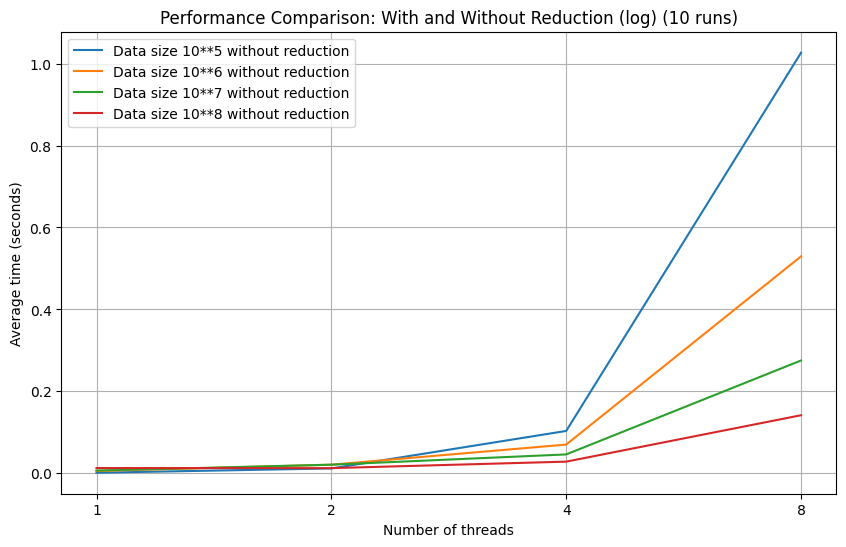

In [20]:
# Данные
data_sizes = ['10**5', '10**6', '10**7', '10**8']
num_threads = ['1', '2', '4', '8']

# Среднее время без редукции (в секундах)
time = [
    [
        0.00120763, 0.0116252, 0.103227, 1.02672  # Num cores: 1
    ],
    [
        0.00527453, 0.0208588, 0.0699427, 0.529491  # Num cores: 2
    ],
    [
        0.00657132, 0.0208052, 0.0459022, 0.275257  # Num cores: 4
    ],
    [
        0.0126469, 0.0124093, 0.0282681, 0.141566  # Num cores: 8
    ]
]


fig, ax = plt.subplots(figsize=(10, 6))

for i, size in enumerate(data_sizes):
    ax.plot(num_threads, time[i], label=f'Data size {size} without reduction')

ax.set_xlabel('Number of threads')
ax.set_ylabel('Average time (seconds)')
ax.set_title('Performance Comparison: With and Without Reduction (log) (10 runs)')
ax.legend()

plt.grid(True)
plt.show()


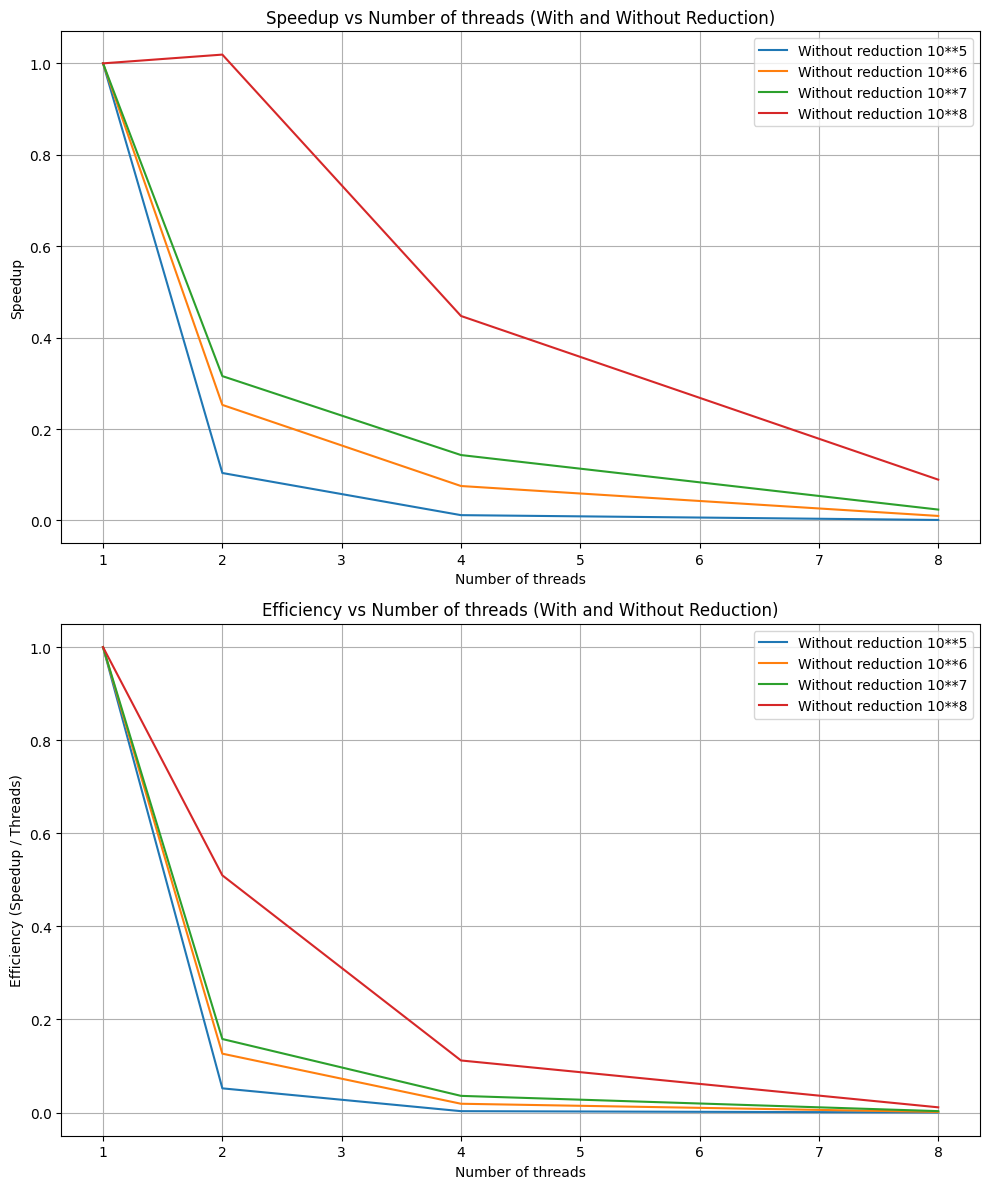

In [21]:
# Рассчитываем ускорение (Speedup) для без редукции и с редукцией
speedup = []
num_threads = list(map(int, num_threads))
# Польза каждого ядра
efficiency = []

for i in range(len(data_sizes)):
    # Скорость с 1 потоком (первая запись из каждой строки) для без редукции
    base_time = time[i][0]
    
    # Для каждого количества потоков считаем ускорение для без редукции и с редукцией
    speedup.append([base_time/ t for t in time[i]])
    
    # Считаем пользу каждого ядра (эффективность) для без редукции и с редукцией
    efficiency.append([s / nt for s, nt in zip(speedup[i], num_threads)])

# Построение графиков
fig, ax = plt.subplots(2, 1, figsize=(10, 12))

# График ускорения
for i, size in enumerate(data_sizes):
    ax[0].plot(num_threads, speedup[i], label=f'Without reduction {size}')
    
ax[0].set_xlabel('Number of threads')
ax[0].set_ylabel('Speedup')
ax[0].set_title('Speedup vs Number of threads (With and Without Reduction)')
ax[0].legend()
ax[0].grid(True)

# График эффективности (пользы ядра)
for i, size in enumerate(data_sizes):
    ax[1].plot(num_threads, efficiency[i], label=f'Without reduction {size}')

ax[1].set_xlabel('Number of threads')
ax[1].set_ylabel('Efficiency (Speedup / Threads)')
ax[1].set_title('Efficiency vs Number of threads (With and Without Reduction)')
ax[1].legend()
ax[1].grid(True)

plt.tight_layout()
plt.show()
